<a href="https://colab.research.google.com/github/Poriteslutea/data_structure_python/blob/master/Grind169.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grind169

[Notion Link](https://www.notion.so/grind169-88af5fc653f3498b8f3162fe7114c876)

[官神題解](https://github.com/wisdompeak/LeetCode)

In [ ]:
from typing import List

# Array

## 121. Best Time to Buy and Sell Stock

https://leetcode.com/problems/best-time-to-buy-and-sell-stock/

easy, dynamic programming

給定一個array有每天的股價，選定一天買並在有持股時的另一天才能賣，到最後一天時，回傳能得到的最大利潤
### Example：
```
Input: prices = [7,1,5,3,6,4]
Output: 5
Explanation: Buy on day 2 (price = 1) and sell on day 5 (price = 6), profit = 6-1 = 5.
Note that buying on day 2 and selling on day 1 is not allowed because you must buy before you sell.

```
### Idea：
在一次的for loop內，找出當前最小值，以及當前最大利潤:max(原本最大利潤,當日利潤)，找到最後一個數後即可返回最大利潤。雖然不能當日買當日賣，但如果當日價格是目前最低價的話，當日賣的利潤最多也只是0而已，所以這邊就沒有去寫：
```
if min_price == v:
  continue
```


這系列有超多題，可以參考[官神動態規畫小講座](https://www.youtube.com/watch?v=FLbqgyJ-70I&t=1028s&ab_channel=HuifengGuan)

但這題其實沒用到dp array也都還能解，比較像的類題是：[53.Maximum Subarray](https://leetcode.com/problems/maximum-subarray/) 個人滿喜歡的一題，哈哈

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:

        min_price = float('inf')
        max_profit = 0

        for v in prices:
            min_price = min(min_price, v)
            max_profit = max(max_profit, v-min_price)

        return max_profit


In [ ]:
s = Solution()
prices = [7,1,5,3,6,4]
ret = s.maxProfit(prices)
print(ret)

## 169. Majority Element

https://leetcode.com/problems/majority-element/description/

easy

給一個序列，裡面會有一個主要的數，那個數的數量會是序列長度的一半以上

### Example：
```
Input: nums = [2,2,1,1,1,2,2]
Output: 2
```
### Idea：
把整個array排序，正中間偏左那個index一定會是majority element~~因為題目也保證一定會給有majority element的array

如果可能不會有majority element，那目前寫的這個方法就可能會失效，可以用`collections.Counter(nums)`來算各個元素出現幾次，再用`sorted(list(c.items()),key=lambda x:x[1])`去排序數量，並取數量最大的majority



In [ ]:
class Solution:
    def majorityElement(self, nums: List[int]) -> int:
       mi = len(nums)//2
       nums.sort()
       return nums[mi]

## 283. Move Zeroes

https://leetcode.com/problems/move-zeroes/description/

easy

把序列中的0移到最後面，要in-place的改動序列，不可以再做新序列

### Example：
```
Input: nums = [0,1,0,3,12]
Output: [1,3,12,0,0]
```

### Idea：
另外存一組新的Index, 遇到0就continue，只把要放進去的數以新index存放

但會剩最後幾個多出來的位置，再把0放進去即可

In [ ]:
class Solution:
    def moveZeroes(self, nums: List[int]) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """

        i = 0
        for v in nums:
            if v == 0:
                continue
            else:
                nums[i] = v
                i += 1

        for idx in range(i,len(nums)):
            nums[idx] = 0


        return nums

## 57. Insert Interval

https://leetcode.com/problems/insert-interval/description/

medium

對原有區間插入一個新區間，然後重新組合各區間

### Example:
```
Input: intervals = [[1,2],[3,5],[6,7],[8,10],[12,16]], newInterval = [4,8]
Output: [[1,2],[3,10],[12,16]]
Explanation: Because the new interval [4,8] overlaps with [3,5],[6,7],[8,10].
```

### Idea:
又是這題，之前寫過，放在Leetcode.Array，重寫又再度花2小時才accepted...

第一部分：
1. 設一個空序列及空集合，然後for loop原有的intervals，如果newInterval的值在目前的區間中，將值加入原有的interval並append進空序列中，處理完的值pop掉，然後標記這個index到空集合中
  - **注意pop順序，首先要處理第一個數沒pop但要pop第二個數的case，再來才是pop兩個數的case**

2. 如果目前interval的index沒在標記的集合中，直接append interval

3. newInterval中落單沒被處理到的值(不在原區間內的)，加到新序列中，如果兩個值都沒有，需個別element以list的形式append進來，要不然在下一步會被當成正常的區間

第二部分：
1. 新序列現在有append newInterval的值的區間，子序列長度會是奇數(1 or 3)，先依各區間起始位置排序新序列

2. 再設一個回傳的空序列，接著for loop新序列，首次遇到奇數子序列，flag=1並記錄最小值，再次遇到奇數子序列，flag=0並記錄最大值(終止位置)，flag=1又是偶數序列就跳過，flag=0但是是偶數序列就正常append進來，最後這個新序列就可回傳做為答案

麻煩的地方：

新區間有分四種情況：第一個數在原區間內但第二個數在外面、第一個數在原區間外但第二個數在內、整個區間包在原區間內、整個區間包住原區間

Example Input：
```
intervals = [[1,5]]
newInterval = [2,6]

intervals = [[1,5]]
newInterval = [0,3]

intervals = [[1,5]]
newInterval = [2,3]

intervals = [[1,5]]
newInterval = [0,6]
```



In [ ]:
class Solution:
    def insert(self, intervals: List[List[int]], newInterval: List[int]) -> List[List[int]]:

        res = []
        record_idx = set()
        for i in range(len(intervals)):

            while newInterval:
                if len(record_idx) == 0 and intervals[i][0] <= newInterval[1] <= intervals[i][1]:
                    res.append(intervals[i]+[newInterval.pop()])
                    record_idx.add(i)
                if intervals[i][0] <= newInterval[0] <= intervals[i][1]:
                    res.append(intervals[i]+[newInterval.pop()])
                    record_idx.add(i)
                else:
                    break

            if i not in record_idx:
                res.append(intervals[i])


        if newInterval:
            for x in newInterval:
                res.append([x])

        print(res)

        ss = sorted(list(map(lambda x:sorted(x), res)), key=lambda x: x[0])
        ret = []
        flag = 0
        for i in range(len(ss)):
            if len(ss[i]) % 2 == 0 and flag == 0:
                ret.append(ss[i])
            elif len(ss[i]) % 2 == 0 and flag == 1:
                continue
            elif len(ss[i]) % 2 == 1 and flag == 0:
                flag = 1
                si = ss[i][0]
            elif len(ss[i]) % 2 == 1 and flag == 1:
                ei = ss[i][-1]
                ret.append([si,ei])
                flag = 0

        return ret





## 15. 3Sum

https://leetcode.com/problems/3sum/

medium

找出序列中任意三個數的和為0的組別

### Example：
```
Input: nums = [-1,0,1,2,-1,-4]
Output: [[-1,-1,2],[-1,0,1]]
Explanation:
nums[0] + nums[1] + nums[2] = (-1) + 0 + 1 = 0.
nums[1] + nums[2] + nums[4] = 0 + 1 + (-1) = 0.
nums[0] + nums[3] + nums[4] = (-1) + 2 + (-1) = 0.
The distinct triplets are [-1,0,1] and [-1,-1,2].
Notice that the order of the output and the order of the triplets does not matter.
```

### Idea：
之前寫過，就是先for loop nums[:-2]，這裡nums可以先排好序，剩下的數的序列中任意兩數和要是當前數的負值，這樣三數和就等於0，我是先把two_sum()寫好，並且當取到後兩數時，將三數的結果加到要回傳的集合中(add tuple)

中間有寫個，遇到重複的數略過，以加快一點速度。

In [ ]:
class Solution:
    def threeSum(self, nums: List[int]) -> List[List[int]]:

        def two_sum(arr,goal):
            hashmap = dict()
            for v in arr:
                if v in hashmap:
                    res.add((-goal, v, goal-v))
                else:
                    hashmap[goal-v] = True

        nums.sort()
        res = set()
        for i,v in enumerate(nums[:-2]):
            if i >= 1 and v == nums[i-1]:
                continue

            arr_behind_v = nums[(i+1):]
            two_sum(arr_behind_v, -nums[i])

        return list(res)

## 238. Product of Array Except Self

https://leetcode.com/problems/product-of-array-except-self/description/

medium(easy)

找出序列中除了自己的其他數的乘積，時間複雜度要O(n)，空間複雜度要O(1)

### Example：
```
Input: nums = [1,2,3,4]
Output: [24,12,8,6]

# with zero case
Input: nums = [-1,1,0,-3,3]
Output: [0,0,9,0,0]

```

### Idea：

概念就是先得到整個序列的乘積，之後用總乘積去除當前值即可。

比較麻煩的是處理有0的case，如果只有一個零的話，其他的數還是會有個乘積，如果有兩個零以上，就整個序列都會是0，所以這裡在算總積時用了兩個total_product，當第一次遇到0時，total_product會變0，但另一個total_product_exp_one_zero不會去乘這個0，如果再遇到0，那就兩個積都是0了

之後是正式for loop nums，分別去給值即可。


In [ ]:
class Solution:
    def productExceptSelf(self, nums: List[int]) -> List[int]:

        total_product_exp_one_zero = 1
        total_product = 1

        for i in nums:
            if i == 0 and total_product != 0:
                total_product = 0
                continue
            total_product_exp_one_zero *= i
            total_product *= i


        for i,v in enumerate(nums):
            if total_product_exp_one_zero == 0:
                nums[i] = 0
            elif v == 0:
                nums[i] = total_product_exp_one_zero
            else:
                nums[i] = total_product//v

        return nums


## 128. Longest Consecutive Sequence

https://leetcode.com/problems/longest-consecutive-sequence/description/

medium

找出最長長度的連續值子序列

### Example：
```
Input: nums = [100,4,200,1,3,2]
Output: 4
Explanation: The longest consecutive elements sequence is [1, 2, 3, 4]. Therefore its length is 4.

Input: nums = [1,2,0,1]
Output: 3

```

### Idea:

這題就是看下一個數是不是當前數+1，是的話length長度就加一(n)，如果遇到不是，就去看目前的n是不是最大長度，然後n初始化為1，繼續找下一個連續的序列。

有幾個狀況要注意：
1. 當判斷完整個序列，如果終止在「`if nums[j] == (nums[i]+1)`」那裡的話，就抓不到最後一組n，所以外面要再取一次n，以免尾端被忽略的情形

2. 當`len(nums)==0`就直接回傳0, 這裡沒寫的話就會回傳到1

3. 因為題目的序列會有重複的情況，以目前的方法(只跟前一數做判斷)會失效，所以先把整個list取set再做sort，把重複數給去掉，目前的方法就能用溜~

In [ ]:
class Solution:
    def longestConsecutive(self, nums: List[int]) -> int:

        nums = sorted(list(set(nums)))

        if not nums:
            return 0


        max_len = 0
        n = 1
        for i in range(len(nums)-1):
            j = i+1
            if nums[j] == (nums[i]+1):
                n += 1
            else:
                max_len = max(max_len,n)
                n = 1

        max_len = max(max_len,n)


        return max_len

## 189. Rotate Array

https://leetcode.com/problems/rotate-array/description/

easy~medium

把array最右邊的數移到最前面，移動k次，array變怎樣(in-place modify)

### Example：
```
Input: nums = [1,2,3,4,5,6,7], k = 3
Output: [5,6,7,1,2,3,4]
Explanation:
rotate 1 steps to the right: [7,1,2,3,4,5,6]
rotate 2 steps to the right: [6,7,1,2,3,4,5]
rotate 3 steps to the right: [5,6,7,1,2,3,4]
```

### Idea：

目前的解法還不是O(1)space，但概念簡單～記得k如果超過n次，用他的餘數即可

先做一個extend array，把由前面移到後面的數加到array中

接著依序把值加到原來的array中

In [ ]:
class Solution:
    def rotate(self, nums: List[int], k: int) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        n = len(nums)
        k = k % n
        ext = nums + nums[:(n-k)]

        ri = n-k
        for i in range(n):
            nums[i] = ext[ri+i]

## 525. Contiguous Array

https://leetcode.com/problems/contiguous-array/description/

medium

找出1和0數量相同的子序列

### Example：

```
Input: nums = [0,1,0]
Output: 2
Explanation: [0, 1] (or [1, 0]) is a longest contiguous subarray with equal number of 0 and 1.
```

### Idea：

[官神題解](https://github.com/wisdompeak/LeetCode/tree/master/Hash/525.Contiguous-Array)  Hash+prefix sum

概念是遇到1時加一，遇到0時減一，如果再遇到一樣的prefix_sum，就代表這個區間內1和0的數量一樣，然後為了防止最大子串長度的開頭就是由第一個數開始的，我們存放prefix_sum的index的hashmap，需給一個{0:1}進來~~~


In [ ]:
class Solution:
    def findMaxLength(self, nums: List[int]) -> int:

        prefix_sum_dict = {0:-1}
        summ = 0
        result = 0
        for i,v in enumerate(nums):
            if v == 1:
                summ += 1
            elif v == 0:
                summ -= 1

            if summ not in prefix_sum_dict:
                prefix_sum_dict[summ] = i
            else:
                result = max(result, i - prefix_sum_dict[summ])

        return result

## 560. Subarray Sum Equals K

https://leetcode.com/problems/subarray-sum-equals-k/solutions/

medium

找出序列中加起來為k的子序列有幾個
### Example：

```
Input: nums = [1,2,3], k = 3
Output: 2

```

### Idea:

和上面一樣是hashtable + prefixSum

目前的序列和 - k，就是總序列和 - 目標子序列和(k)，會是另外一段子序列和(這一段一定是從頭算起的)，如果之前的prefixSum中已經有過這個數(hashmap中)，則把這個子序列和出現的總數加到return值裡。

hashmap中，如果當前的序列和沒有出現過，就加到hashmap，有出現過了，就把這個序列和的count數+1(hashmap的value)，有時候序列和因為有正有負，中間數和為0，所以會出現重複的情況。
```
case 1: 和為k的子序列不是從index 0開始的，但這樣不好追蹤，改追蹤由index 0開始的子序列和(prefixSum - k)，因為這個值可以在for loop遍歷的時候丟到hashmap中記錄下來，重複時還能計次

[|-------------|***|]
[|prefixSum - k| k |]
[|prefixSum -  k|k |] *也會像這樣，子序列長度不同，但和相同，有這樣的狀況就在hashmap中count+1

case 2: 和為k的子序列本身就是從index 0開始的某個prefixSum，那prefixSum - k會直接是0，所以hashmap要設個初始值{0:1}以幫助計數這種狀況

[||****************|]
[||       k        |]


```


In [ ]:
class Solution:
    def subarraySum(self, nums: List[int], k: int) -> int:
        prefixsum = 0
        d = {0:1}
        res = 0

        for num in nums:

            prefixsum += num

            if prefixsum - k in d:
                res += d[prefixsum - k]

            if prefixsum not in d:
                d[prefixsum] = 1
            else:
                d[prefixsum] += 1

          print(d)
        return res


## 239. Sliding Window Maximum

https://leetcode.com/problems/sliding-window-maximum/

Hard-

輸出sliding window的最大值

### Example：
```
Input: nums = [1,3,-1,-3,5,3,6,7], k = 3
Output: [3,3,5,5,6,7]
Explanation:
Window position                Max
---------------               -----
[1  3  -1] -3  5  3  6  7       3
 1 [3  -1  -3] 5  3  6  7       3
 1  3 [-1  -3  5] 3  6  7       5
 1  3  -1 [-3  5  3] 6  7       5
 1  3  -1  -3 [5  3  6] 7       6
 1  3  -1  -3  5 [3  6  7]      7

```

### Idea：



# String

## 179. Largest Number

https://leetcode.com/problems/largest-number/description/

medium

判定非負數字串怎麼排列可以併成一個最大的正整數

### Example：

```
Input: nums = [3,30,34,5,9]
Output: "9534330"

```

### Idea:

[官神題解](https://github.com/wisdompeak/LeetCode/tree/master/Greedy/179.Largest-Number)：
兩兩比較，相當於進行「bubble sort」，排完序後，放越前面的數會使整個合併的數值最大。

[functools.cmp_to_key -- 官方說明](https://docs.python.org/3/library/functools.html#functools.cmp_to_key)：

基本上就是設compare(a,b)客製化一個比較a與b的函式，a>b時給正值，a=b時給0，a<b時給負值，接著當`sorted(my_list, key=cmp_to_key(compare))`時，就會以客製化的規則對my_list進行排序，預設是遞增排序，但如果想遞減，就要倒轉一下(或反向調整比較規則)

有點難靠自己想到的一題～但可以多認識一下sort key這些。


In [ ]:
from functools import cmp_to_key

class Solution:
    def largestNumber(self, nums: List[int]) -> str:
        # 設立一個新的排序方式
        # cmp_to_key() 在標準庫functools中的一個函數，可將兩個比較用的值轉成sorted()key中的函數

        def new_sort(a,b):
          return int(b+a) - int(a+b)

        nums = [str(i) for i in nums]
        res = sorted(nums, key=cmp_to_key(new_sort))

        return ''.join(res) if int(''.join(res)) != 0 else '0'

## 8. String to Integer (atoi)

https://leetcode.com/problems/string-to-integer-atoi/description/

medium（不難但很莫名）

好像是實現C裡面的atoi function

### Example：

```
Input: s = "4193 with words"
Output: 4193
Explanation:
Step 1: "4193 with words" (no characters read because there is no leading whitespace)
         ^
Step 2: "4193 with words" (no characters read because there is neither a '-' nor '+')
         ^
Step 3: "4193 with words" ("4193" is read in; reading stops because the next character is a non-digit)
             ^
The parsed integer is 4193.
Since 4193 is in the range [-231, 231 - 1], the final result is 4193.

```

### Idea：

1. 有數字進來之前，只允許'+','-',' '，遇其他符號直接break，當數字進來之後，再遇到任何符號都break

2. 如果數字前面有負號的話，這個值會是負的

3. 值域要在-2^31 ~ 2^31之內，要設一個是超出範圍要進行clamp的動作

- 數字有沒有進來，可以看append數字的list有沒有值，沒有值代表數字沒進來
- 符號有沒有進來過，可以立一個flag，初始為0，遇負號為-1，遇正號為1，遇空格忽略
- 空格與正負號會不會break就看現在前面有沒有其他數字或flag，都沒有就不用break
- 數字要不要變負就看flag沒有有等於-1
- 設一個超過限制區間就clamp的判斷

In [ ]:
class Solution:
    def myAtoi(self, s: str) -> int:

      readin = []
      flag = 0
      for i in s:
          if i.isdigit():
              readin.append(i)
          elif flag == 0 and not readin and i == ' ':
            continue
          elif flag == 0 and not readin and i == '-':
            flag = -1
          elif flag == 0 and not readin and i == '+':
            flag = 1
          else:
            break


      if not readin:
        return 0

      if flag < 0:
        res = 0 - int(''.join(readin))
      else:
        res = int(''.join(readin))


      if res <= -2147483648:
        res = -2147483648

      if res >= 2147483648:
        res = 2147483647

      return res


# Stack

## 150. Evaluate Reverse Polish Notation

https://leetcode.com/problems/evaluate-reverse-polish-notation/description/

medium（偏easy)

Reverse Polish notation 某種符號在最後的四則運算表達式

### Example

```
Input: tokens = ["10","6","9","3","+","-11","*","/","*","17","+","5","+"]
Output: 22
Explanation: ((10 * (6 / ((9 + 3) * -11))) + 17) + 5
= ((10 * (6 / (12 * -11))) + 17) + 5
= ((10 * (6 / -132)) + 17) + 5
= ((10 * 0) + 17) + 5
= (0 + 17) + 5
= 17 + 5
= 22

```



### Idea

遇到數字時就append到另一個stack，當遇到運算符號時就pop最後兩個數字做運算，

運算結果append回stack，for loop跑完整個token，最後stack中應該只會剩一個數字，即運算結果。


In [ ]:
class Solution:
    def evalRPN(self, tokens: List[str]) -> int:
        # 如果遇到符號，就把丟進「數字stack」中的最後兩個數字做運算，結果再丟回去數字stack
        num_stack = []
        for v in tokens:
            if v in ['+', '-', '*', '/']:
                num1 = num_stack.pop()
                num2 = num_stack.pop()
                if v == '+':
                    num = num1 + num2
                elif v == '-':
                    num = num2 - num1
                elif v == '*':
                    num = num2 * num1
                elif v == '/':
                    num = num2 / num1


                num_stack.append(int(num))
            else:
                num_stack.append(int(v))


        return num_stack[0]

## 739. Daily Temperatures

https://leetcode.com/problems/daily-temperatures/description/

medium

回傳每個位置幾天後遇到比自己溫度更高的日子

### Example：

```
Input: temperatures = [73,74,75,71,69,72,76,73]
Output: [1,1,4,2,1,1,0,0]
```

### Idea：

1. 設定一個operation_stack, 當現在日期的溫度比前一天低時，就append進去（與當前日期的index一起放進來），如果遇到溫度比前一天高的，就pop掉前一天的值，並且index互減以得到天數差，然後依位置放到要回傳的數列中。
2. 要回傳的數列先給定一個空間出來，之後依位置放天數差進去～一開始沒想清楚這點，卡了一下

In [ ]:
class Solution:
    def dailyTemperatures(self, temperatures: List[int]) -> List[int]:
        # 給res一個空間，標記各個溫度的index，遇到比較大的溫度時，就用那個位置的Index去減當前數的index(差的天數）並存在對應的res位置中。

        op_stack = []
        ret = [0 for i in temperatures]

        for i,v in enumerate(temperatures):
            while op_stack and v > op_stack[-1][0]:
                cur_pair = op_stack.pop()
                days = i - cur_pair[1]
                ret[cur_pair[1]] = days
            op_stack.append((v,i))

        return ret


## 394. Decode String

https://leetcode.com/problems/decode-string/description/

medium (不難但有些小細節要注意)

解碼字串

### Example：

```
Input: s = "3[a2[c]]"
Output: "accaccacc"
```

### Idea：
原來的想法是給一個放數字的stack, 與一個放字母的stack，
遇到左中括號一樣加到放字母的stack（此時要把前面的數字字串合併為一個數字並加到數字stack），然後遇到右中括號時，開始pop放字母的stack（放到queue中）當pop到左中括號時停止，並把這個queue的字母乘上數字stack的最後數字，得出的新字串丟回字母stack（此時要把字母stack的左中括號也移除），照此規則走完最後再合併字母stack成一字串即可回傳。

- 這樣要放四個list, 網路上有人合併數字那使用 cur_num = 10*cur_num + v 還不錯，用進位的方式，可以少用一個list

- 注意字串與數字的轉換

In [ ]:
class Solution:
    def decodeString(self, s: str) -> str:
        # 一開始的想法
        op_que = deque()
        op_num = []
        num_stack = []
        letter_stack = []
        for v in s:
            if v.isdigit():
                op_num.append(v)
            elif v == '[':
                letter_stack.append(v)
                cur_num = int(''.join(op_num))
                num_stack.append(cur_num)
                op_num = []
            elif v == ']':
                while letter_stack[-1] != '[':
                    op_que.appendleft(letter_stack.pop())
                if num_stack:
                    cur_str = num_stack.pop() * op_que
                    letter_stack.pop()
                    letter_stack.extend(cur_str)
                    op_que = deque()
            else:
                letter_stack.append(v)



        return ''.join(letter_stack)

In [ ]:
class Solution:
    def decodeString(self, s: str) -> str:
        # 這裡少用一個op_num的list，空間有節省，但速度還是慢QQ 可能是我去跑那個while花時間了，還有改進空間
        op_que = deque()
        cur_num = 0
        letter_stack = []
        num_stack = []
        for v in s:
            if v.isdigit():
                cur_num = cur_num * 10 + int(v)
            elif v == '[':
                letter_stack.append(v)
                num_stack.append(cur_num)
                cur_num = 0
            elif v == ']':
                while letter_stack[-1] != '[':
                    op_que.appendleft(letter_stack.pop())
                cur_str = num_stack.pop() * op_que
                letter_stack.pop()
                letter_stack.extend(cur_str)
                op_que = deque()
                cur_num = 0
            else:
                letter_stack.append(v)

## 735. Asteroid Collision

https://leetcode.com/problems/asteroid-collision/description/

medium

行星不同方向會對撞，質量高的會留下來繼續行駛

### Example

```
Input: asteroids = [10,2,-5]
Output: [10]
Explanation: The 2 and -5 collide resulting in -5. The 10 and -5 collide resulting in 10.
```

### Idea

這題陷井很多！
- 同向的都放進來stack

- 遇到不同向時，判斷stack最後的數是不是向右，如果向左的話就正常append，代表不會撞到下一顆。

- 不同向且向右的話，現在的數+stack[-1]，如果變同向，就不動繼續往前比下一個星星，如果一樣反向，stack.pop()，現在的數繼續與stack[-1]比，直到變同向，要注意一下兩個星星質量一樣一起爆炸的狀況，除了stack的星星要pop掉，新的star也要pop掉，如果變同向不繼續動，但是是一起向左，也要append進來。

- 也要注意一下反向離開的情況！只有正遇到負會爆炸，負遇到正不會

- 要注意相同質量各自消散的情形，會造成stack為空，或新的star把之前的星星都消完了，此時要做處理

1. 有沒有互撞
2. 撞完往哪個方向走，和下一顆反方向的話會不會互撞，哪顆消散
3. 避免stack為空值卻呼叫stack[-1]的情況

In [ ]:
class Solution:
    def asteroidCollision(self, asteroids: List[int]) -> List[int]:
        # 先設定一個direction, 同向的都放進來stack，遇到不同向時，現在的數+stack[-1]，如果變同向，就不動繼續往前比下一個星星，如果一樣反向，stack.pop()，現在的數繼續與stack[-1]比，直到變同向，要注意一下兩個星星質量一樣一起爆炸的狀況。

        # 也要注意一下反向離開的情況！只有正遇到負會爆炸，負遇到正不會

        # 要注意相同質量各自消散的情形，會造成stack為空


        stack = [asteroids[0]]
        for star in asteroids[1:]:
            if not stack:
                stack.append(star)
                continue
            if star * stack[-1] < 0:
                if stack[-1] > 0:
                    collision = star + stack[-1]
                    while stack and collision * stack[-1] < 0:
                        stack.pop()
                        if not stack:
                            break
                        collision = star + stack[-1]
                    if collision == 0:
                        stack.pop()
                        continue
                    elif collision < 0:
                        stack.append(star)
                else:
                    stack.append(star)
            else:
                stack.append(star)


        return stack

## 227. Basic Calculator II

https://leetcode.com/problems/basic-calculator-ii/description/

medium

中序式字串四則運算

### Example：
```
Input: s = "3+2*2"
Output: 7
```

### Idea：

1. 得到中序式的list，空格不要、連續數字字串合併為單一整數

2. 中序式轉換為後序式（符號設優先程度）數字的話正常輸出，符號就進行判斷，如果讀取到的符號優先程度小於等於stack[-1]的優先程度，stack[-1]就pop掉，輸出到output list，如果大於的話就正常append到stack中，stack沒東西也正常append，最後Output list就會變後序式排列

3. 後序式排列的計算就跟150題一樣，也是設個stack，數字正常輸出，遇符號的話就pop最後兩個數字進行計算，算完結果再丟回output list，最後output list應該只會剩一個數，就是結果

* 不過時間不夠快，感覺能再參考其他人寫法優化（可能step1和2可以在一個for loop中進行完？）

In [ ]:
class Solution:
    def calculate(self, s: str) -> int:

        if len(s) == 1:
            return int(s)

        inorder = []
        cur_num = []
        for i in s:
            if i.isdigit():
                cur_num.append(i)
            elif i == ' ':
                continue
            else:
                inorder.append(int(''.join(cur_num)))
                inorder.append(i)
                cur_num = []

        if cur_num:
            inorder.append(int(''.join(cur_num)))

        priority_map = {'/':1, '*':1, '+':0, '-':0}
        postorder = []
        stack = []
        for i in inorder:
            if isinstance(i, int):
                postorder.append(i)
            elif stack:
                while priority_map[i] <= priority_map[stack[-1]]:
                    postorder.append(stack.pop())
                    if not stack:
                        break
                stack.append(i)
            else:
                stack.append(i)

        while stack:
            postorder.append(stack.pop())

        res = []
        for i in postorder:
            if isinstance(i, int):
                res.append(i)
            else:
                num2 = res.pop()
                num1 = res.pop()
                if i == '+':
                    res.append(num1 + num2)
                elif i == '-':
                    res.append(num1 - num2)
                elif i == '*':
                    res.append(num1 * num2)
                elif i == '/':
                    res.append(int(num1 / num2))

        return res[0]

# Linked List

In [ ]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

## 148. Sort List

https://leetcode.com/problems/sort-list/description/

medium

排序

### Example：
```
Input: head = [4,2,1,3]
Output: [1,2,3,4]
```

### Idea：

使用「Merge sort」

- 第一個divide是利用兩個pointer，一個一次走兩步，一個一次走一步，當快指標走到底時，慢指標會剛好指在中間位置

- 當分成兩個linked list之後，設一個新的linked list head，兩邊的head選出值較小的指過去，被指到的linked list就跳至下一個node，當有一邊的linked list指到底，接著就回傳那個新設的Linked list(前面要存一個dummy head，最後可以指向整個Linked list)

- 第三個sortlist()，即是進行merge sort，合併排序示意圖如下：
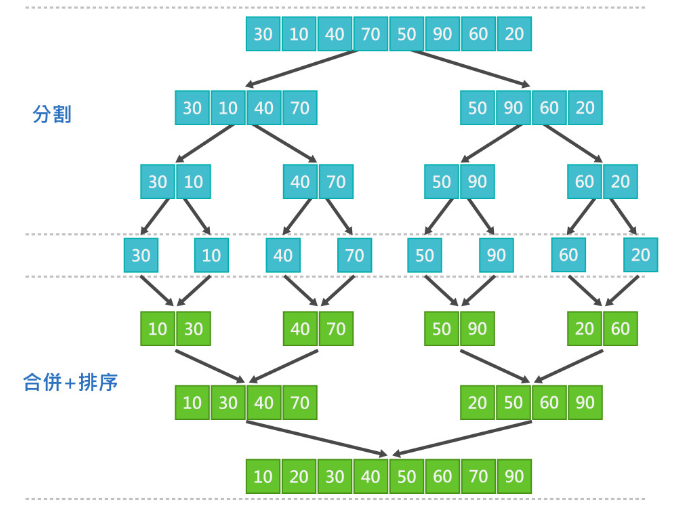


In [ ]:
class Solution:
    def divide(self,head):
        slow,fast=head,head.next
        while fast and fast.next:
            slow=slow.next
            fast=fast.next.next
        return slow

    def Merge(self,l,r):
        temp=ans=ListNode()
        while l and r:
            if l.val<=r.val:
                temp.next=l
                l=l.next
            else:
                temp.next=r
                r=r.next
            temp=temp.next
        if l:
            temp.next=l
        if r:
            temp.next=r
        return ans.next


    # 合併排序法！
    def sortList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if not head or not head.next:
            return head
        left=head
        right=self.divide(head)
        temp=right.next
        right.next=None
        right=temp
        left=self.sortList(left)
        right=self.sortList(right)
        return self.Merge(left,right)

## 143. Reorder List

https://leetcode.com/problems/reorder-list/description/

medium

1,2,3,4排成1,4,2,3，以此類推

### Example：
```
Input: head = [1,2,3,4,5]
Output: [1,5,2,4,3]
```

### Idea：

第一個是自己想的，但沒有accept~**因為當Linked list太長就會超過時間（每次都要遞迴到最後一數）**<br>

主要想法是放四個指標，a指向原位，b指向原位的下一格，c,d以差一格的方式走到結尾，指向最後兩個node，接著把c.next = None讓他變成新的結尾，再來設定環（a.next = d, d.next = b），接著a = b（以b的位置當新的head），開啟下一輪，直到a.next = None或a.next.next = None，就在前一個node結束。
- 先設四個指標a,b,c,d都指向原head
- b = a.next   c = a.next  d = a.next.next
- b不動，c跟d同時往右跑，步數相同，當d.next = None時停止，此時c在倒數第二個node，d在結尾
- c.next = None 把c變成最後一個node
- a.next = d,  d.next = b 設第一個環
- a = b
- b = a.next, c = a.next, d = a.next.next
- if not d, c.next = None 結束
- if not b(c), a.next = None 結束
- return dummy_head.next


第二個是參考別人的，先找到中間node，接著分成兩半，將後半部的Linked list倒轉，再間隔組合兩個List～也是滿直覺的想法～～沒想到哇！


In [ ]:
# 第一個自己原先想法，Time Limit Exceeded


class Solution:
    def reorderList(self, head: Optional[ListNode]) -> None:
        """
        Do not return anything, modify head in-place instead.
        """
        dummy_head = ListNode()
        dummy_head.next = head
        a, b, c, d = head, head, head, head

        while b:
            b = a.next
            c = a.next
            if not b:
                a.next = None
                break
            d = a.next.next
            if not d:
                c.next = None
                break

            while d and d.next:
                c = c.next
                d = d.next

            c.next = None

            a.next = d
            d.next = b
            a = b


        return dummy_head.next

In [ ]:
# 第二個是參考別人的

class Solution:
    def reorderList(self, head):
        #step 1: find middle
        if not head: return []
        slow, fast = head, head
        while fast.next and fast.next.next:
            slow = slow.next
            fast = fast.next.next

        #step 2: reverse second half
        prev, curr = None, slow.next
        while curr:
            nextt = curr.next
            curr.next = prev
            prev = curr
            curr = nextt
        slow.next = None

        #step 3: merge lists
        head1, head2 = head, prev
        while head2:
            nextt = head1.next
            head1.next = head2
            head1 = head2
            head2 = nextt

        return prev.next

## 2181. Merge Node Between Zeros

https://leetcode.com/problems/merge-nodes-in-between-zeros/?envType=daily-question&envId=2024-07-04

easy~medium 非grind169

0之間的node相加

### Example：
```
Input: head = [0,3,1,0,4,5,2,0]
Output: [4,11]
```

### Idea：
太久沒寫linkednode，所以後來有看解，但概念上沒想錯，就是一路sum，然後建一個新linked list，如果遇到0，就把之前的sum放到新list，放完後sum = 0

需要注意的是，要把dummy head留起來。

In [ ]:
class Solution:
  def mergeNodes(self, head: Optional[ListNode]) -> Optional[ListNode]:
    dummy = ListNode(0)
    new_link = dummy
    head = head.next
    sum = 0
    while head:
      if head.val == 0:
        if sum != 0:
          new_link.next = ListNode(sum)
          new_link = new_link.next
          sum = 0
        else:
          sum += head.val
        head = head.next
    return dummy.next

## 1823. Find the Winner of the Circluar Game

https://leetcode.com/problems/find-the-winner-of-the-circular-game/description/?envType=daily-question&envId=2024-07-08

easy~medium 非grind169

### Idea:
聽信討論區的用了circular linked list，還算滿有趣的解了出來，但時間上只beat 2%的人...而且寫了滿久

偷看解，有人用餘數的方式在一個while內幾行就有解，有空再研究看看另一種解法。



In [ ]:
class Solution:
    def findTheWinner(self, n: int, k: int) -> int:
        # 處理一些邊緣case
        if n == 1:
            return 1
        if k == 1:
            return n

        # 做一個環形的linked list
        head = ListNode(0)
        dummy_head = head

        for i in range(n):
            head.next = ListNode(i+1)
            head = head.next

        head.next = dummy_head.next
        head = head.next

        # 玩遊戲
        i = 1
        out_num = 0
        while out_num < n:
            i += 1
            if i == k:
                head.next = head.next.next
                i = 1
                out_num += 1
            head = head.next

        return head.val